# Wiki PageViews EDA

Wikipedia started collecting page view data starting July 2015, so we'll be excluding any timeframes before then.

## Set Up
Installing necessary packages and importing modules.

In [5]:
#make sure API package is installed, uncomment if not
#!pip install pageviewapi --user

import pandas as pd
import numpy as np

#for plotting
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import rcParams
rcParams['figure.figsize'] = (20, 10)

import plotly.express as px

#apis for data
import pageviewapi

Make list of the timeframes we're looking at for the hastag trends and album releases.

In [2]:
#make list of timeframes, reuse trends code

hashtag_timeframes = ['2020-06-01 2020-06-18',
                      '2020-06-20 2020-07-04',
                      '2021-01-18 2021-02-01']

bts_timeframes = ['2014-08-17 2014-08-31',
                 '2018-05-16 2018-05-30',
                 '2020-11-18 2020-12-02']

ts_timeframes = ['2014-10-25 2014-11-08',
                '2017-11-08 2017-11-22',
                '2020-07-22 2020-08-05']

jb_timeframes = ['2012-06-13 2012-06-27',
                '2015-11-11 2015-11-25',
                '2020-02-12 2020-02-26']

dashed_tf = [bts_timeframes, ts_timeframes, jb_timeframes]

#adjust timeframes for Wiki format

hashtag_timeframes = list(map(lambda x: x.replace('-', '').split(), hashtag_timeframes))

bts_timeframes = list(map(lambda x: x.replace('-', '').split(), bts_timeframes))[1:]

ts_timeframes = list(map(lambda x: x.replace('-', '').split(), ts_timeframes))[1:]

jb_timeframes = list(map(lambda x: x.replace('-', '').split(), jb_timeframes))[1:]

music_timeframes = [bts_timeframes, ts_timeframes, jb_timeframes]

Querying the API and making the list of terms we want searched.

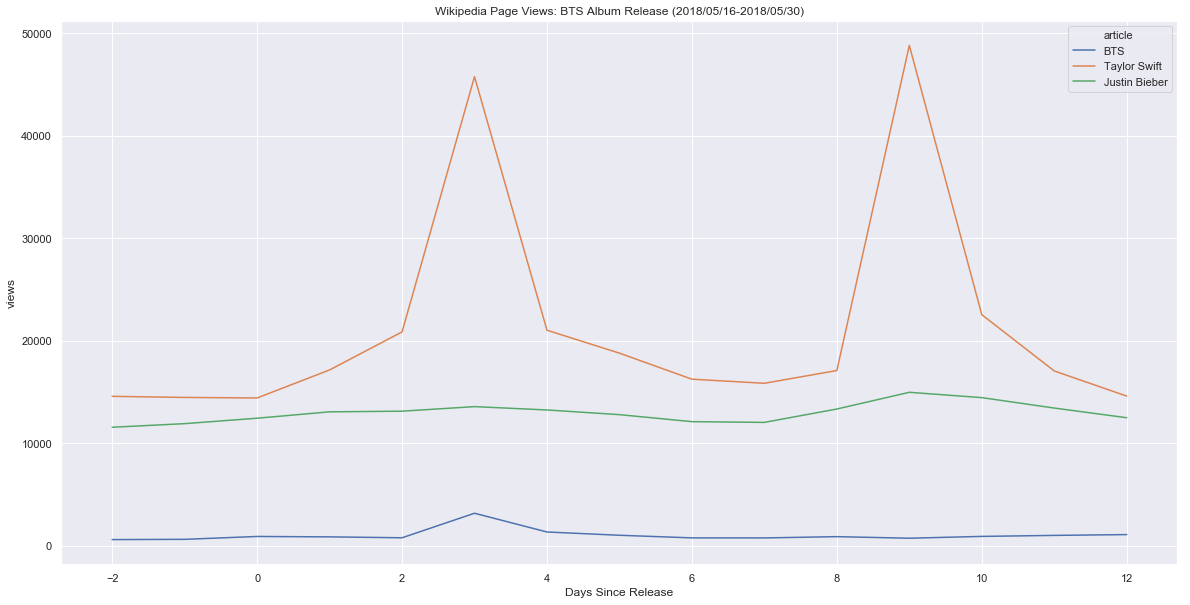

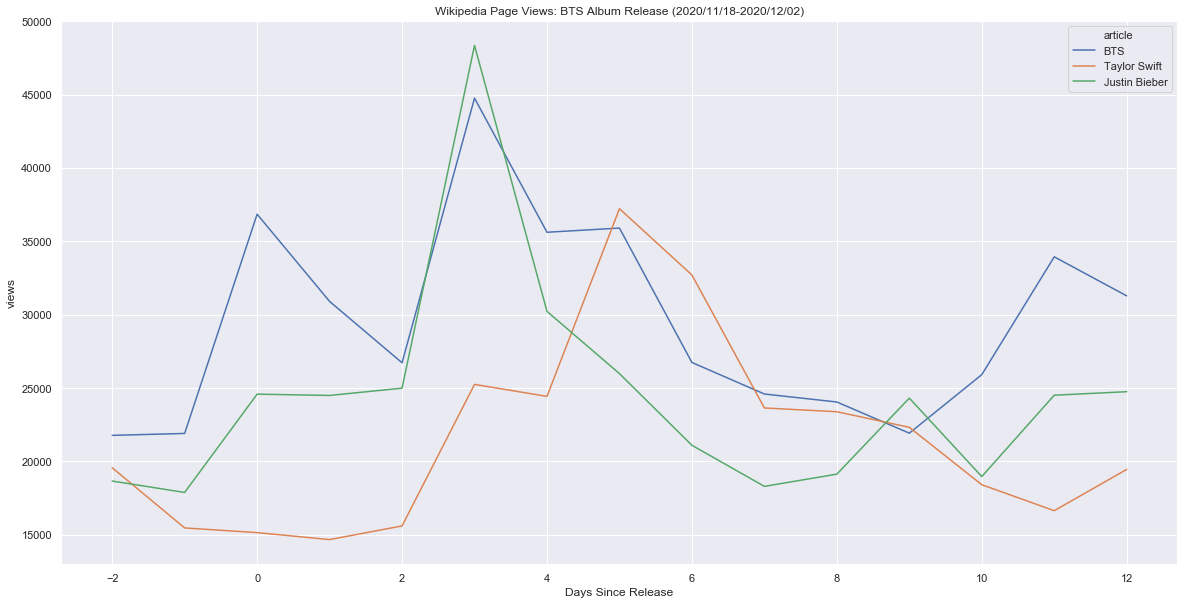

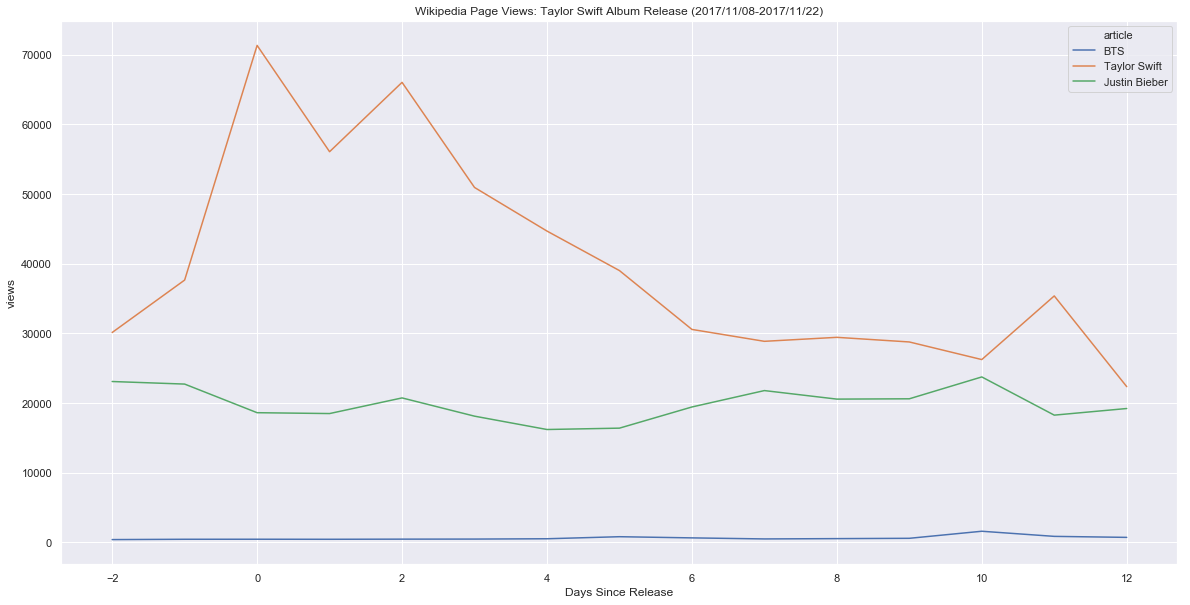

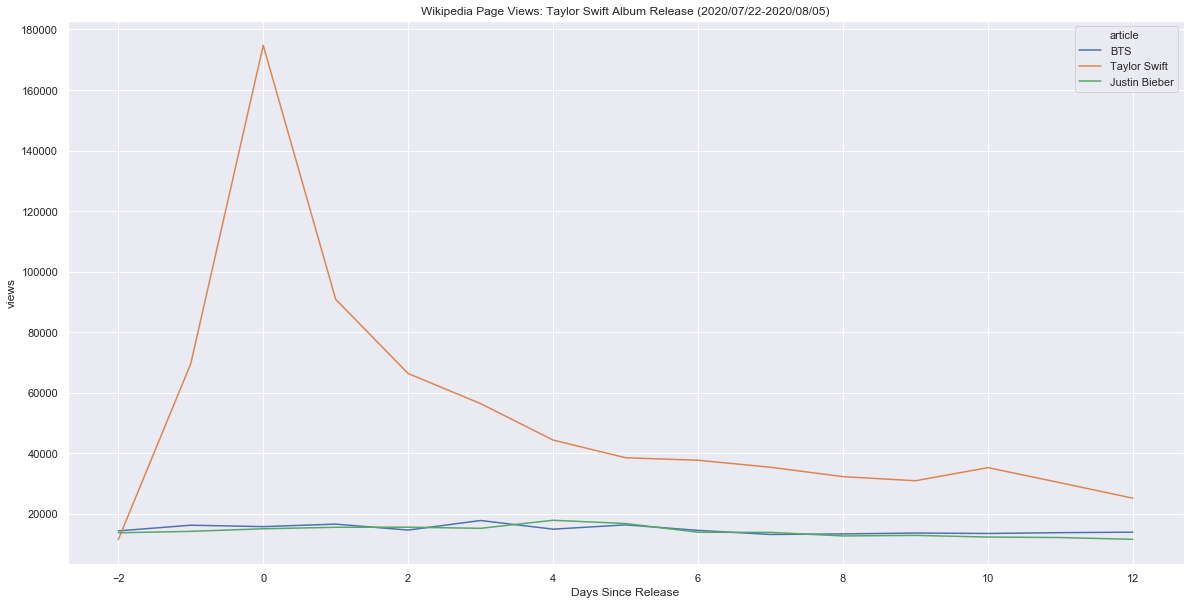

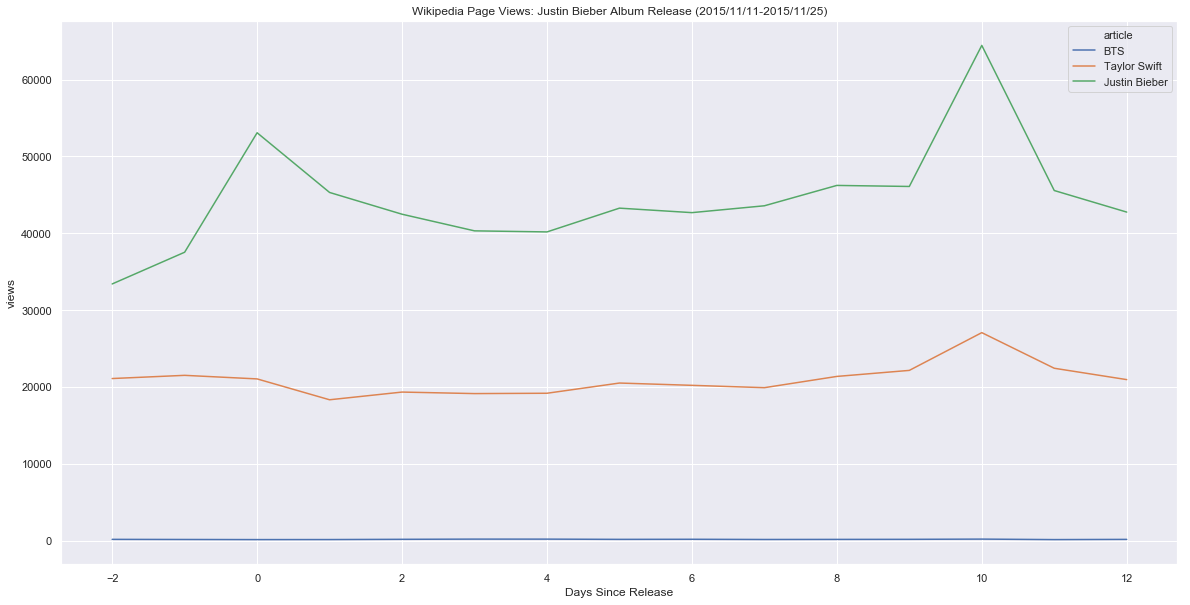

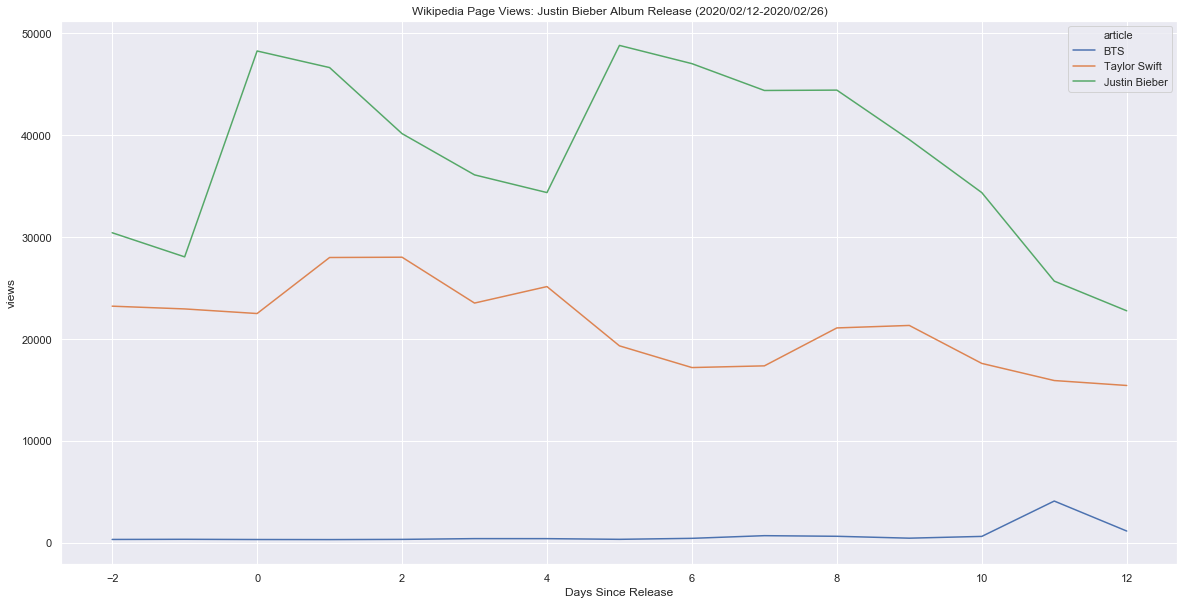

<Figure size 1440x720 with 0 Axes>

In [9]:
artist_albums = ['BTS', 'Taylor Swift', 'Justin Bieber']
c = 0
df_list = []

for albums in music_timeframes:
    
    for dates in albums:
        time_data = pd.DataFrame()
        
        for artist in artist_albums:
            start_date = dates[0][:4] + '/' + dates[0][4:6] + '/' + dates[0][6:8]
            start_alt = start_date.replace('/', '-')
            
            end_date = dates[1][:4] + '/' + dates[1][4:6] + '/' + dates[1][6:8]
            end_alt = end_date.replace('/', '-')
            
            
            title_text = 'Wikipedia Page Views: ' + artist_albums[c] +\
                        ' Album Release (' + start_date + '-' +\
                        end_date + ')'
            
            file_name = 'graphs/' + 'WP_' + artist_albums[c] + '_' + start_alt +\
                        '_' + end_alt

            try:
                page_views = pageviewapi.per_article('en.wikipedia', artist,
                                                     dates[0], dates[1],
                                                     granularity='daily').items()

                page_views = list(page_views)[0][1]
                page_views = pd.DataFrame.from_dict(page_views)
                page_views = page_views[['article', 'timestamp', 'views']]
                page_views['Days Since Release'] = np.arange(-2, 13)
                
                page_views['timestamp'] = page_views['timestamp']\
                    .apply(lambda x: x[:4] + '-' + x[4:6] + '-' + x[6:8])
                
                page_views['article'] = page_views['article']\
                    .apply(lambda y: y.replace('_', ' '))
                
                time_data = pd.concat([time_data, page_views])
                
            except:
                continue
                
        g = sns.lineplot(data = time_data,
                                 dashes = False,
                                 x = 'Days Since Release',
                                 y = 'views',
                                 hue = 'article')

        g.xaxis.set_major_locator(ticker.MaxNLocator(nbins = 8))
        g.set_title(title_text)

        plt.show()
        plt.savefig(file_name, dpi = 300)
        
        df_list.append(time_data)
        
    c += 1      